In [8]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import copy

# number of items in our problem
num_items = 40

# hill climbing genotype
genotype = np.random.choice([0, 1], (num_items))
print(genotype)

#the list of benefits and volumes, and the max volume
max_volume = 80
benefits = np.array([1, 2, 6 ,8, 5, 3, 8, 8, 1, 9, 2, 6, 9, 5, 2, 8, 6, 5, 9, 6, 3, 9 ,6 ,1 ,7 ,2, 6, 7, 8, 1, 3, 5, 4, 5, 9, 7, 7,2, 9, 5])
volumes = np.array([8, 6, 9, 3, 1, 9, 5, 4, 3, 3, 8, 3 ,9 ,6 ,5 ,4 ,2, 3, 4, 4, 3 ,9 ,4 ,5 ,1 ,1, 8, 8, 5, 7, 1, 7 ,5 ,8 ,3 ,7, 5, 1, 9, 1])
print(benefits)
print(volumes)

[1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 1]
[1 2 6 8 5 3 8 8 1 9 2 6 9 5 2 8 6 5 9 6 3 9 6 1 7 2 6 7 8 1 3 5 4 5 9 7 7
 2 9 5]
[8 6 9 3 1 9 5 4 3 3 8 3 9 6 5 4 2 3 4 4 3 9 4 5 1 1 8 8 5 7 1 7 5 8 3 7 5
 1 9 1]


In [9]:
# fitness function
#depending on the proximity to max volume, penalize the total fitness
# if it is above a certain threshold, static penalisation of 50%
def fitness_function(genotype, benefits, volumes, max_volume):
    benefit = []
    volume = []
    for i in range(len(genotype)):
        benefit.append(genotype[i] * benefits[i])
        volume.append(genotype[i] * volumes[i])
    if sum(volume) >= max_volume+20:
        pen = 0.5
    else:
        pen = abs((max_volume - sum(volume))/100)
    penalty_multiplier = 1 - pen
    pen_benefit = sum(benefit)*penalty_multiplier
    return pen_benefit



In [10]:
fitness_function(genotype, benefits, volumes, max_volume)

71.0

In [11]:
#mutation functions
def mutate10(genotype, probability=0.1):
    for i in range(len(genotype)):
        if np.random.uniform(0, 1) < probability:
            genotype[i] ^= 1
    return genotype

def mutate20(genotype, probability=0.2):
    for i in range(len(genotype)):
        if np.random.uniform(0, 1) < probability:
            genotype[i] ^= 1
    return genotype

def mutate30(genotype, probability=0.3):
    for i in range(len(genotype)):
        if np.random.uniform(0, 1) < probability:
            genotype[i] ^= 1
    return genotype 

In [12]:
#the crossover function
def crossover(W, L, prob):
    for i in range(len(L)):
        if np.random.uniform(0, 1) < prob:
            L[i] = W[i]

In [13]:
num_individuals = 50 # number of individuals
k = 3 # define local neighbourhood

genotypes = np.random.choice([0, 0], (num_individuals, num_items))
print(len(genotypes))

50


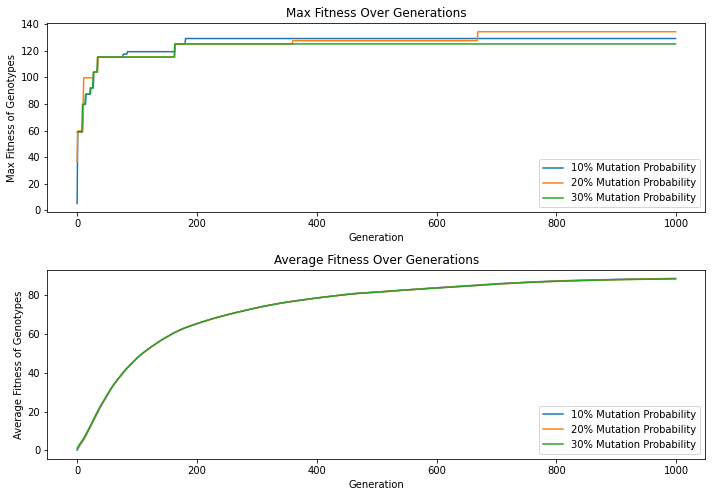

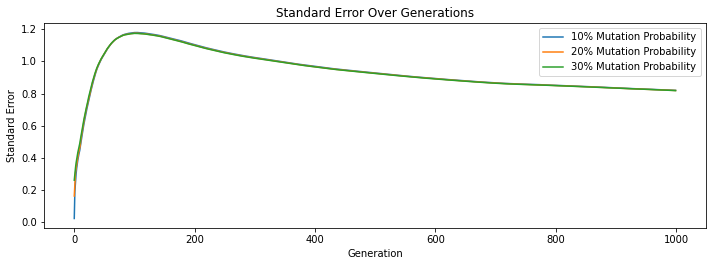

In [14]:
from numpy.lib.function_base import average
#number of generations, and lists to house the data to plot later
generations = 1000
max_fit_prob_10 = []
max_fit_prob_20 = []
max_fit_prob_30 = []
avg_fit_prob_10 = []
avg_fit_prob_20 = []
avg_fit_prob_30 = []
generations_sizes_prob_10 = []
generations_sizes_prob_20 = []
generations_sizes_prob_30 = []
fitnesses_prob_10 = []
fitnesses_prob_20 = []
fitnesses_prob_30 = []
std_prob_10 = []
std_prob_20 = []
std_prob_30 = []

#the full microbial genetic algorithm
# compare the two individuals, determine a winner, alter the loser with crossover and mutations
for j in range(generations):
    g1_index = np.random.randint(0, num_individuals)
    g1 = copy.deepcopy(genotypes[g1_index])
    if g1_index + 1 == num_individuals:
        g2_index = g1_index - 1
    else:
        g2_index = np.random.randint(g1_index + 1, min(num_individuals, g1_index + k)) # pick random neighbour
    g2 = copy.deepcopy(genotypes[g2_index])
    fit1 = fitness_function(g1, benefits, volumes, max_volume)
    fit2 = fitness_function(g2, benefits, volumes, max_volume)
    L_index = 0
    if fit1 >= fit2:
        W = g1
        L = g2
        L_index = g2_index
    else:
        W = g2
        L = g1
        L_index = g1_index
    crossover(W,L,0.5)


    #mutation probabilty of 10% data
    L = mutate10(copy.deepcopy(W))
    genotypes[L_index] = copy.deepcopy(L)
    for gene in genotypes:
        fitnesses_prob_10.append(fitness_function(gene, benefits, volumes, max_volume))
    max_fit_prob_10.append(max(fitnesses_prob_10))
    avg_fit_prob_10.append(average(fitnesses_prob_10))
    std_prob_10.append(np.std(fitnesses_prob_10)/np.sqrt(generations))
    generations_sizes_prob_10.append(j)


     #mutation probabilty of 20% data
    L = mutate20(copy.deepcopy(W))
    genotypes[L_index] = copy.deepcopy(L)
    for gene in genotypes:
        fitnesses_prob_20.append(fitness_function(gene, benefits, volumes, max_volume))
    max_fit_prob_20.append(max(fitnesses_prob_20))
    avg_fit_prob_20.append(average(fitnesses_prob_20))
    std_prob_20.append(np.std(fitnesses_prob_20)/np.sqrt(generations))
    generations_sizes_prob_20.append(j)

     #mutation probabilty of 30% data
    L = mutate30(copy.deepcopy(W))
    genotypes[L_index] = copy.deepcopy(L)
    for gene in genotypes:
        fitnesses_prob_30.append(fitness_function(gene, benefits, volumes, max_volume))
    max_fit_prob_30.append(max(fitnesses_prob_30))
    avg_fit_prob_30.append(average(fitnesses_prob_30))
    std_prob_30.append(np.std(fitnesses_prob_30)/np.sqrt(generations))
    generations_sizes_prob_30.append(j)

#the plots
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
plt.plot(generations_sizes_prob_10, max_fit_prob_10, label = '10% Mutation Probability')
plt.plot(generations_sizes_prob_20, max_fit_prob_20, label = '20% Mutation Probability')
plt.plot(generations_sizes_prob_30, max_fit_prob_30, label = '30% Mutation Probability')
plt.xlabel("Generation")
plt.ylabel("Max Fitness of Genotypes")
plt.title("Max Fitness Over Generations")
plt.legend()


plt.subplot(3,1,2)
plt.plot(generations_sizes_prob_10, avg_fit_prob_10, label = '10% Mutation Probability')
plt.plot(generations_sizes_prob_20, avg_fit_prob_20, label = '20% Mutation Probability')
plt.plot(generations_sizes_prob_30, avg_fit_prob_30, label = '30% Mutation Probability')
plt.xlabel("Generation")
plt.ylabel("Average Fitness of Genotypes")
plt.title("Average Fitness Over Generations")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize = (10,10))
plt.subplot(3,1,3)
plt.plot(generations_sizes_prob_10, std_prob_10, label = '10% Mutation Probability')
plt.plot(generations_sizes_prob_20, std_prob_20, label = '20% Mutation Probability')
plt.plot(generations_sizes_prob_30, std_prob_30, label = '30% Mutation Probability')
plt.xlabel("Generation")
plt.ylabel("Standard Error")
plt.title("Standard Error Over Generations")
plt.legend()
plt.tight_layout()
plt.show()